In [119]:
import pandas as pd
import pickle
import seaborn as sns
from matplotlib import pyplot as plt

In [38]:
## load scraped data
data = pickle.load(open("../data/hotel_info_final2.pkl", "rb"))
data = data.rename(columns={'url': 'link'})
print(data.shape)
data.head()

(307, 20)


,hotel_name_,stars,location,review_rating,description,main_facilities,total_reviews,sub_ratings,sub_ratings_categories,sub_ratings_dict,hotel_surroundings,hotel_surroundings_distance,surroundings_dict,room_type,price_list,cheapest_price,facilities_groups,all_facilities,link,room_price_dict
0,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...","[Quezon City Hall Park and Lagoon, Children's ...","[900 m, 900 m, 1.1 km, 1.3 km, 1.6 km, 1.6 km,...","{'Quezon City Hall Park and Lagoon': '900 m', ...","[Deluxe Room, Economy Double Room, Economy Dou...","[977.0, 1413.0, 1944.0, 1954.0, 2150.0, 1590.0...",977.0,"[Bathroom, Bedroom, Media & Technology, Parkin...","[[Toilet paper, Towels, Towels/Sheets (extra f...",https://www.booking.com/hotel/ph/reddoorz-near...,"{'Single Room': 1238.0, 'Executive Suite': 185..."
1,Skylab Guesthouse,2,"213B, Aldrin Street, Moonwalk Village 1, Parañ...",8.0,You're eligible for a Genius discount at Skyla...,"[Non Smoking Rooms, Spa & Wellness Centre, Fre...",79,"[8.8, 7.8, 8.3, 8.4, 8.4, 8.1, 7.5]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.8', 'Facilities': '7.8', 'Cleanli...","[Barcelona Park, Guadalajara Park, Continental...","[950 m, 1.3 km, 1.5 km, 1.6 km, 1.7 km, 1.7 km...","{'Barcelona Park': '950 m', 'Guadalajara Park'...","[Double Room, Queen Room, Double Room with Sha...","[1709.0, 1709.0, 1709.0]",1709.0,"[Bathroom, Bedroom, View, Outdoors, Kitchen, R...","[[Toilet paper, Towels, Additional bathroom, B...",https://www.booking.com/hotel/ph/skylab213b.ht...,"{'Double Room with Shared Bathroom': 1709.0, '..."
2,The Excelsior Hotel Las Piñas,4,"1345 Alabang–Zapote Road, Las Pinas, 1750 Mani...",7.3,"Located in Manila, 12.2 km from Mall of Asia A...","[Swimming pool, Airport Shuttle, Non Smoking R...",6,"[7.9, 8.3, 7.9, 8.8, 7.9, 7.9, 7.9]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '7.9', 'Facilities': '8.3', 'Cleanli...","[Philamlife Village Park, Jasmin Circle open-c...","[550 m, 1,000 m, 1 km, 1 km, 1.2 km, 1.4 km, 1...","{'Philamlife Village Park': '550 m', 'Jasmin C...","[Deluxe Room, Deluxe Room, Executive Room, Exe...","[3010.0, 3571.0, 3724.0, 4357.0, 4499.0, 5077....",3010.0,"[Bathroom, Bedroom, View, Outdoors, Room Ameni...","[[Toilet paper, Towels, Bidet, Guest bathroom,...",https://www.booking.com/hotel/ph/the-excelsior...,"{'One Bedroom Suite ': 4788.0, 'Executive Prem..."
3,Rothman Hotel,3,"1633 M. Adriatico St., Malate, 1004 Manila, Ph...",7.8,Rothman Hotel is located in the district of Ma...,"[Non Smoking Rooms, Room-service, Free Parking...",45,"[8.3, 7.6, 8.0, 7.8, 7.8, 8.7, 8.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.3', 'Facilities': '7.6', 'Cleanli...","[Pedro Gil Park, Manila Baywalk, Remedios Circ...","[250 m, 450 m, 450 m, 500 m, 750 m, 950 m, 1,0...","{'Pedro Gil Park': '250 m', 'Manila Baywalk': ...","[Renovated King Room, Deluxe Double Room, Delu...","[2160.0, 2545.0, 3223.0, 2545.0, 3223.0]",2160.0,"[Bathroom, Kitchen, Living Area, Media & Techn...","[[Private Bathroom, Toilet, Free toiletries, S...",https://www.booking.com/hotel/ph/rothman-manil...,"{'Deluxe Twin Room': 2545.0, 'Deluxe Double Ro..."
4,OYO 772 Remedios Apartment,3,"909, Remedios St, Manila Malate Manila, 1004 M...",6.8,You're eligible for a Genius discount at OYO 7...,"[Non Smoking Rooms, Free WiFi Internet Access ...",113,"[7.5, 6.5, 6.9, 6.9, 7.0, 7.7, 8.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '7.5', 'Facilities': '6.5', 'Cleanli...","[Remedios Circle, MMDA Children's Road Safety ...","[600 m, 850 m, 950 m, 950 m, 950 m, 1,000 m, 1...","{'Remedios Circle': '600 m', 'MMDA Children's ...","[Deluxe Double Room, Deluxe 

In [53]:
data['total_reviews'] = data['total_reviews'].replace(r',','', regex=True) 

In [54]:
data['review_rating'] = data['review_rating'].astype('float')
data['stars'] = data['stars'].astype('int')
data['total_reviews'] = data['total_reviews'].astype('int')

In [44]:
sns.set_theme(palette = 'viridis', style='whitegrid')

[Text(0.5, 1.0, 'Distribution of star ratings'),
 Text(0, 0.5, 'number of hotels')]

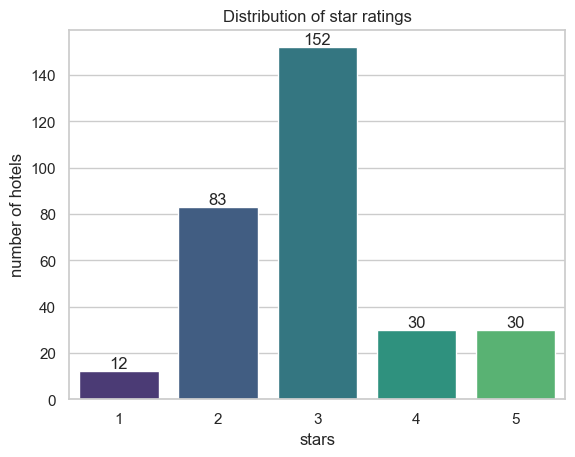

In [45]:
ax = sns.countplot(data = data, x = 'stars')
ax.bar_label(ax.containers[0])
ax.set(title = 'Distribution of star ratings', ylabel='number of hotels')

[Text(0.5, 1.0, 'distribution of review ratings by star rating')]

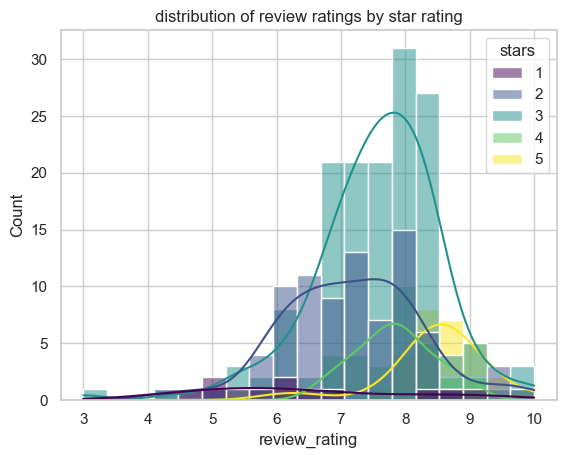

In [174]:
ax = sns.histplot(data = data, x = 'review_rating', hue = 'stars', kde = True, palette = 'viridis')
ax.set(title = 'distribution of review ratings by star rating')

In [48]:
data[['stars', 'review_rating']].groupby('stars').mean()

,review_rating
stars,
1,6.441667
2,7.162651
3,7.563158
4,7.833333
5,8.460000


[Text(0.5, 1.0, 'distribution of review ratings by star rating')]

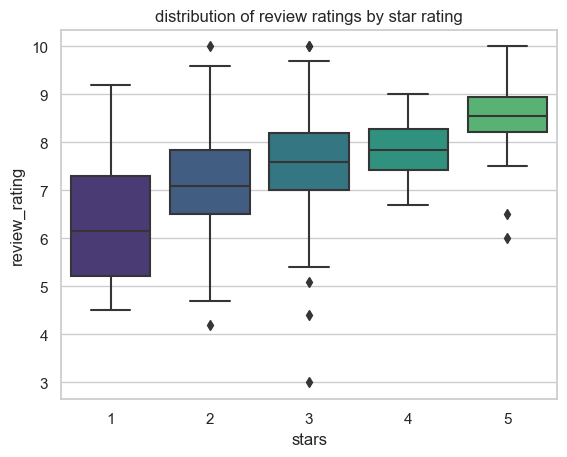

In [50]:
ax = sns.boxplot(data = data, x = 'stars', y = 'review_rating')
ax.set(title = 'distribution of review ratings by star rating')

[Text(0.5, 1.0, 'number of reviews by star rating')]

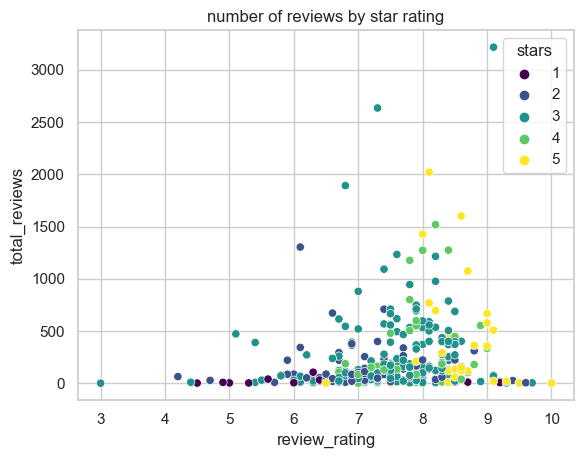

In [177]:
ax = sns.scatterplot(data = data, y = 'total_reviews', x = 'review_rating', hue = 'stars', palette = 'viridis')
ax.set(title = 'number of reviews by star rating')

[Text(0.5, 1.0, 'number of reviews by star rating')]

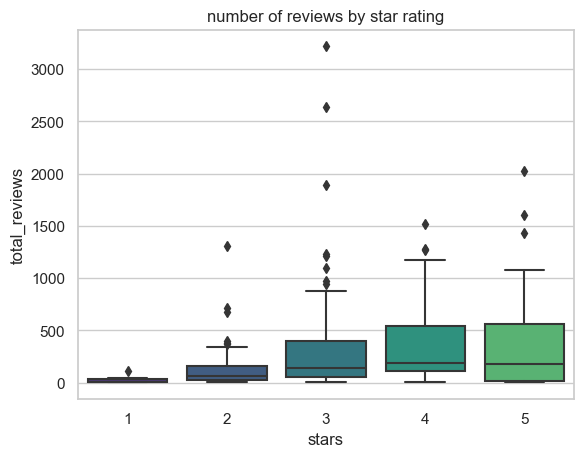

In [63]:
ax = sns.boxplot(data = data, x = 'stars', y = 'total_reviews')
ax.set(title = 'number of reviews by star rating')

In [178]:
data[data['total_reviews'] == max(data['total_reviews'])]

,hotel_name_,stars,location,review_rating,description,main_facilities,total_reviews,sub_ratings,sub_ratings_categories,sub_ratings_dict,hotel_surroundings,hotel_surroundings_distance,surroundings_dict,room_type,price_list,cheapest_price,facilities_groups,all_facilities,link,room_price_dict
276,Hotel 101 Manila - Multiple Use Hotel,3,"EDSA Extension, Mall of Asia Complex, , Pasay,...",9.1,You're eligible for a Genius discount at Hotel...,"[Swimming pool, Airport Shuttle, Non Smoking R...",3217,"[9.4, 9.0, 9.2, 9.2, 9.1, 9.5, 9.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '9.4', 'Facilities': '9.0', 'Cleanli...","[SM BY THE BAY NORTH AREA, Derham Park, Cockpi...","[1.1 km, 1.2 km, 1.8 km, 2.3 km, 2.7 km, 2.8 k...","{'SM BY THE BAY NORTH AREA': '1.1 km', 'Derham...","[Happy Room, Double or Twin Room, Double or Tw...","[2372.0, 3055.0, 3734.0]",2372.0,"[Bathroom, Bedroom, View, Kitchen, Room Amenit...","[[Toilet paper, Towels, Bidet, Guest bathroom,...",https://www.booking.com/hotel/ph/101-manila.ht...,"{'Double or Twin Room': 3055.0, 'Happy Room': ..."


In [65]:
data[['stars', 'total_reviews']].groupby('stars').describe()

total_reviews                                                      \
              count        mean         std  min     25%    50%     75%   
stars                                                                     
1              12.0   22.500000   29.822200  2.0    4.75   10.0   33.25   
2              83.0  129.216867  188.667991  1.0   26.50   64.0  156.50   
3             152.0  298.782895  427.809404  1.0   52.75  137.0  401.25   
4              30.0  384.233333  424.386753  1.0  112.50  186.0  538.75   
5              30.0  399.466667  521.292871  1.0   18.50  179.5  560.00   

               
          max  
stars          
1       106.0  
2      1304.0  
3      3217.0  
4      1518.0  
5      2021.0

### Review Score by Category

In [104]:
df = []
for i in range(len(data['hotel_name_'])):
    hotel_name = data['hotel_name_'][i]
    star = data['stars'][i]
    sub_data = data['sub_ratings_dict'][i]
    temp  = pd.DataFrame.from_dict(sub_data, orient = 'index').reset_index()
    temp['hotel_name_'] = hotel_name
    temp['star'] = star
    temp.rename(columns = {0:'value', 'index':'category'}, inplace = True)
    df.append(temp)

In [105]:
subcategory_data = pd.concat(df)
subcategory_data

,category,value,hotel_name_,star
0,Staff,6.9,RedDoorz near East Avenue Medical Center,2
1,Facilities,6.3,RedDoorz near East Avenue Medical Center,2
2,Cleanliness,6.5,RedDoorz near East Avenue Medical Center,2
3,Comfort,6.5,RedDoorz near East Avenue Medical Center,2
4,Value for money,7.0,RedDoorz near East Avenue Medical Center,2
...,...,...,...,...
2,Cleanliness,7.7,88 Courtyard Hotel,3
3,Comfort,7.8,88 Courtyard Hotel,3
4,Value for money,7.5,88 Courtyard Hotel,3
5,Location,8.1,88 Courtyard Hotel,3


In [114]:
subcategory_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 6
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     2093 non-null   object
 1   value        2093 non-null   object
 2   hotel_name_  2093 non-null   object
 3   star         2093 non-null   int32 
dtypes: int32(1), object(3)
memory usage: 73.6+ KB


In [168]:
subcategory_data[['category','value', 'hotel_name_']].groupby(['category']).count()

,value,hotel_name_
category,,
Cleanliness,307,307
Comfort,307,307
Facilities,307,307
Free WiFi,251,251
Location,307,307
Staff,307,307
Value for money,307,307


In [167]:
subcategory_data[['category','value', 'hotel_name_']].groupby(['category']).mean()

C:\Users\Karen\AppData\Local\Temp\ipykernel_3092\2973172219.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subcategory_data[['category','value', 'hotel_name_']].groupby(['category']).mean()


,value
category,
Cleanliness,7.879153
Comfort,7.853420
Facilities,7.472964
Free WiFi,7.482072
Location,8.102606
Staff,8.363192
Value for money,7.766775


[Text(0.5, 1.0, 'Distribution of review scores by sub-category'),
 Text(0, 0.5, 'Review score')]

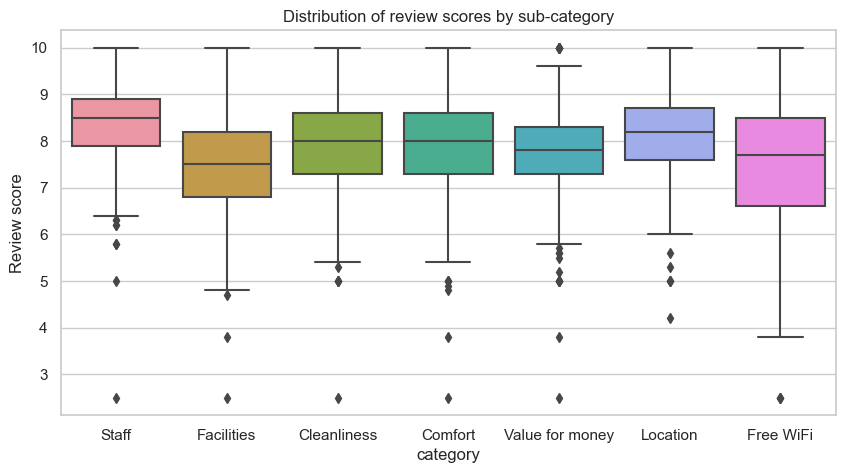

In [173]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data = subcategory_data, x = 'category', y = 'value')
ax.set(title = 'Distribution of review scores by sub-category', ylabel = 'Review score')

[Text(0.5, 1.0, 'Distribution of review scores by sub-category'),
 Text(0, 0.5, 'Review score')]

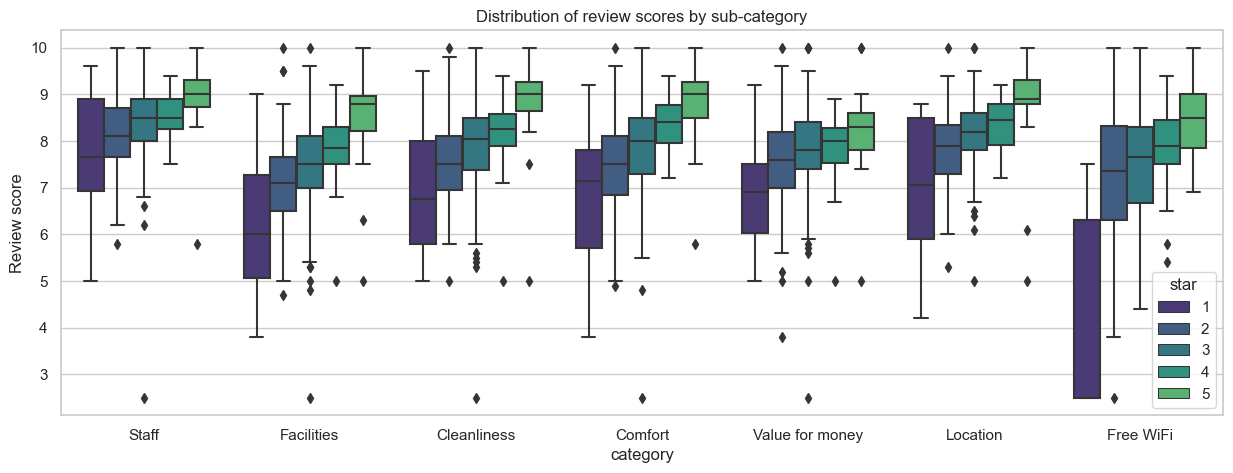

In [171]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data = subcategory_data, x = 'category', y = 'value', hue = 'star')
ax.set(title = 'Distribution of review scores by sub-category', ylabel = 'Review score')

In [143]:
long_subcat_data = subcategory_data[['category','value', 'hotel_name_']].groupby(['category', 'hotel_name_'])['value'].max().reset_index()
long_subcat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     2093 non-null   object 
 1   hotel_name_  2093 non-null   object 
 2   value        2093 non-null   float64
dtypes: float64(1), object(2)
memory usage: 49.2+ KB


In [144]:
long_subcat_data['value'] = long_subcat_data['value'].astype('float')

[Text(0.5, 1.0, 'Distribution of review scores by sub-category'),
 Text(0, 0.5, 'Review score')]

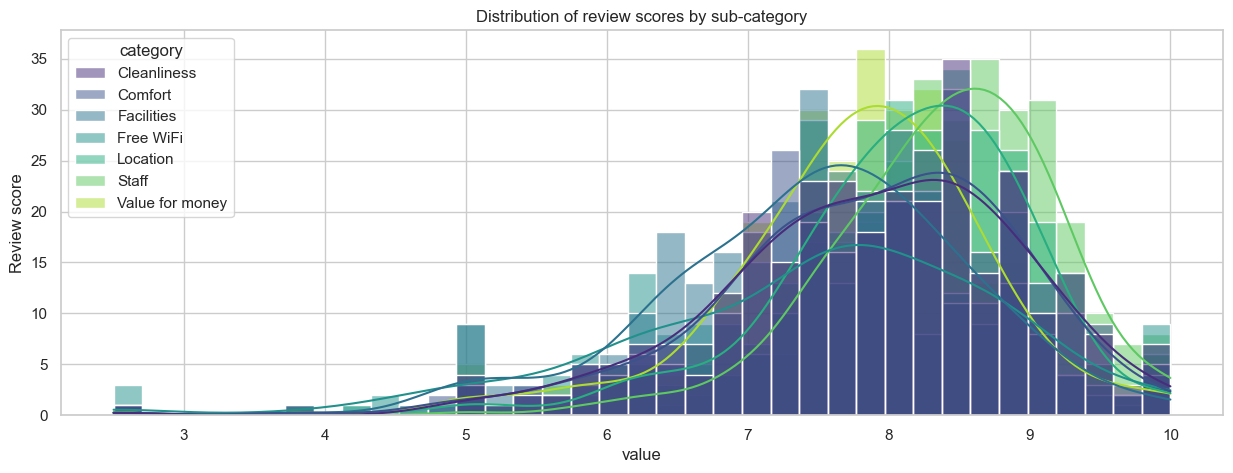

In [176]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data = long_subcat_data, hue = 'category', x = 'value', palette = 'viridis', kde = True)
ax.set(title = 'Distribution of review scores by sub-category', ylabel = 'Review score')

In [169]:
long_subcat_data[['category','value', 'hotel_name_']].groupby(['category']).mean()

C:\Users\Karen\AppData\Local\Temp\ipykernel_3092\2266063579.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  long_subcat_data[['category','value', 'hotel_name_']].groupby(['category']).mean()


,value
category,
Cleanliness,7.879153
Comfort,7.853420
Facilities,7.472964
Free WiFi,7.482072
Location,8.102606
Staff,8.363192
Value for money,7.766775
